# 【《白话机器学习的数学》笔记1】回归
> 基于《白话机器学习的数学》这本书中关于回归的理论知识，准备自己动手利用代码实现一波，来一次真正地从源头上的入门!（所有的应用案例都是贴合书中的内容的，比如现在这里讲回归，所说的案例就是 利用广告费来预测点击量，那么我接下来就通过代码来进行实现。)

> 回归，常用于对连续数据的预测问题

## 简单回归
首先，在书中说到的是利用网站的广告费与点击量之间的关系进行的一次简单的预测，即通过点击量预测广告费。
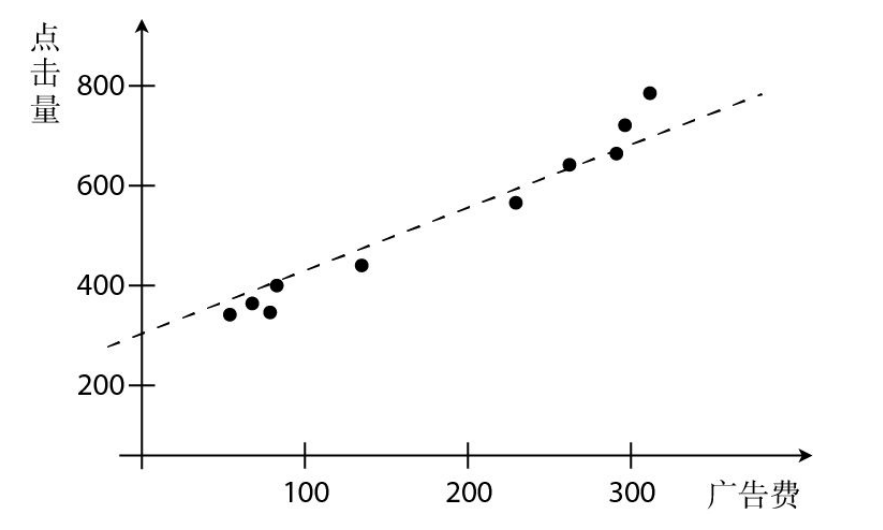
这样的一次函数图像，我们在数学中一般都写为$y=ax+b$，但这里我们更加通用的是使用$\theta_{i}$来表示，即$y=\theta_{1}x+\theta_{0}$来定义我们的一次函数表达式。

我们所要做的就是去确定$\theta_{i}$的值，从而让得到的直线尽可能地多过点。

In [2]:
# 导入matplotlib绘图
import matplotlib.pyplot as plt

In [3]:
# 设置下面两行，以正常显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [4]:
# 模拟一些数据
data = [(60,320),(70,330),(78,323),(140,396),(150,410),(200,450),(236,510),(280,580),(300,600),(310,630)]
# 广告费
ad_fee = [item[0] for item in data]
# 点击量
click = [item[1] for item in data]
ad_fee,click

([60, 70, 78, 140, 150, 200, 236, 280, 300, 310],
 [320, 330, 323, 396, 410, 450, 510, 580, 600, 630])

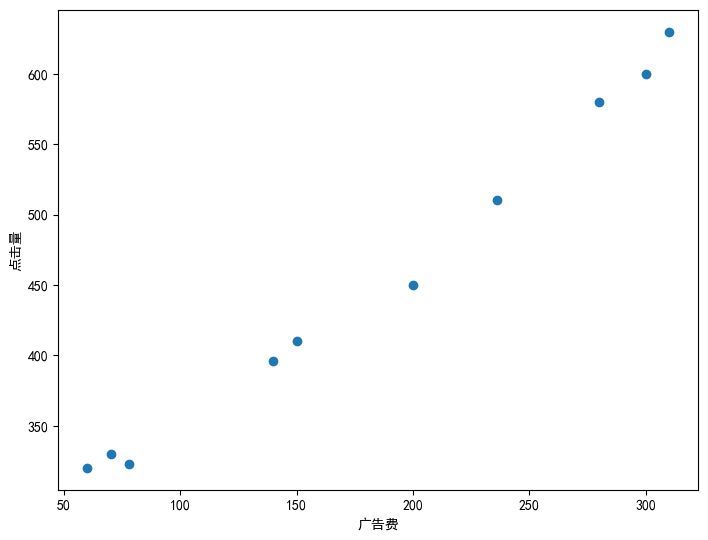

In [5]:
# 绘制图像
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("广告费")
ax.set_ylabel("点击量")

ax.scatter(ad_fee,click)

plt.show()

In [6]:
"""
定义拟合函数,这里先随机选定下参数
(这里一般把参数称之为权值)
""" 
theta_1 = 2
theta_0 = 1
# 确定表达式
pred_y = [theta_1*x+theta_0 for x in ad_fee]
pred_y

[121, 141, 157, 281, 301, 401, 473, 561, 601, 621]

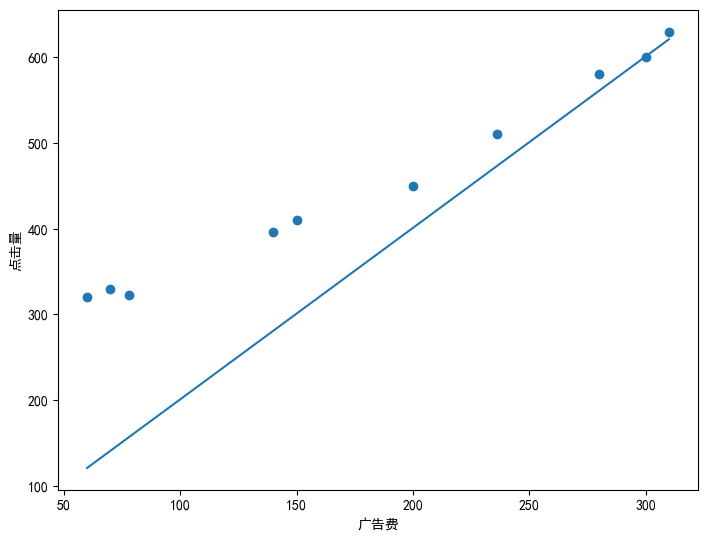

In [7]:
# 绘制图像
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("广告费")
ax.set_ylabel("点击量")

ax.scatter(ad_fee,click)
ax.plot(ad_fee,pred_y)

plt.show()

可以看到这里随机定的直线并没有能够尽可能过多的点，那么我们要怎么样才能够得到更优的直线呢？这里就要引出我们的目标函数了——$E(\theta)=\frac{1}{2}\sum (y-y_{\theta})^{2} $，这里E其实表示的是ERROR，得到的$E(\theta)$是与真实值的差距。（这里并没有说为什么不直接使用预测值与真实值的差值来估计误差，或者预测值与真实值的差值的绝对值来估计，可以思考一下，书中有详细解答。）

注：其实上面所说的$E(\theta)$就是**最小二乘法**，最小二乘法广泛应用于误差估计，**通过最小化误差的平方和来寻找数据的最佳函数匹配**

这里可以先用之前随便定的参数来看一下$E(\theta)$的值

In [8]:
E = sum([(click[i]-pred_y[i])**2 for i in range(len(click))])/2
E

66098.5

66098.5，可以看到误差很大，因此需要调整$\theta_{i}$，获取最佳的函数。这里的调整当然并不是一直随机选，先明确下我们的目的是什么？

我们要做的就是**最小化误差**，让$E(\theta)$尽可能的小。所以求最小值，这里可以引出我们的极值(当然，极值并不一定是最值，但对于我们这里的二次抛物线来说，并不需要考虑这么多)。

OK，知道了要求极值，首先想到的一定是求导，找一阶导为0的点吧。但是，我们需要知道并不是所有的函数都能够直接求出一阶导为0的点。可以**类比下牛顿法求解方程**，我们没有办法直接求出方程的解，但是可以通过**迭代**的方式不断地逼近我们的解。

那么问题又来了，要怎样迭代得到所需的解呢？这里就需要了解**梯度下降法**，在微分学中我们都知道梯度的方向变化速度最快，而梯度相反的方向则是函数值下降最快的方向。这里$E(\theta)$的未知数是$\theta$，因此，我们要做的就是让$\theta$沿着梯度下降的方向走就可以了。

我们知道，在极小值点的左侧是递减的，右侧是递增的，也就是说左侧的导数值小于0，右侧的导数值大于0。所以，我们只需要加上当前导数值的相反数就可以往极小值的方向移动了，即**根据导数的符号来决定移动的方向**。

$$
    x=x-\eta d\frac{g(x)}{dx}
$$
其中的$\eta$是学习率，可以认为是每次值更新的一个跨度，跨的太大和跨的太大都不太好，因此需要选择一个比较合适的大小。$g(x)$对$x$的求导在这里则是$E(\theta)$对$\theta$的求导，但因为我们这里有$\theta_{0}$和$\theta_{1}$两个变量，所以需要求偏导，其实步骤都是一样的，就算一个变成了算两个。

1. 对$y_{\theta}$求导
$$
    -\sum (y-y_{\theta})
$$
2. 对$\theta_{0}$和$\theta_{1}$求导($y_{\theta} = \theta_{1}x+\theta_{0}$)
$$
对\theta_{0}求导 : -\sum (y-y_{\theta})*1
$$
$$
对\theta_{1}求导 : -\sum (y-y_{\theta})*x
$$
3. 更新$\theta_{0}$和$\theta_{1}$
$$
\theta_{0} = \theta_{0}-\eta \sum [(y_{\theta}-y)*1]
$$
$$
\theta_{1} = \theta_{1}-\eta \sum [(y_{\theta}-y)*x]
$$
注意：这里的$x$和$y$是样本点，是已知的。这里的自变量是$\theta_{0}$和$\theta_{1}$，因变量是$y_{\theta}$。

In [9]:
# 随机设置参数(这里重新设置一下，方便后面每次调整，就不用老是往上翻)
theta_0 = 1
theta_1 = 2
# 设置学习率，这里学习率的设置还是要多调一下的，其实个人觉得可以分别给theta_0和theta_1设置学习率，因为两个参数的变化幅度不太一样
learning_rate = 0.000001
# 迭代次数
n = 1000000
# 重新设置pred_y
pred_y = [theta_1*x+theta_0 for x in ad_fee]
# 打印测试
pred_y

[121, 141, 157, 281, 301, 401, 473, 561, 601, 621]

In [10]:
# 测试
sum([(pred_y[i]-click[i])*1 for i in range(len(pred_y))])

-891

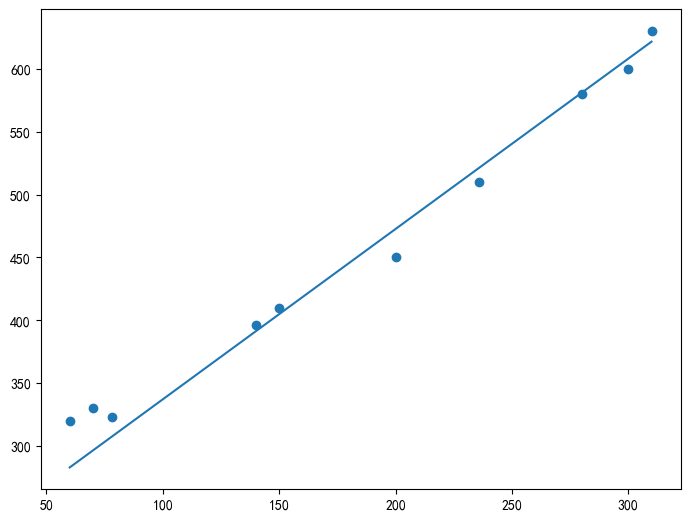

theta_0:201.55686898237883 , theta_1:1.3549571632210207


In [11]:

# 迭代更新theta_0,theta_1
for i in range(n):
    theta_0 = theta_0 - learning_rate*sum([(pred_y[i]-click[i])*1 for i in range(len(pred_y))])
    theta_1 = theta_1 - learning_rate*sum([(pred_y[i]-click[i])*ad_fee[i] for i in range(len(pred_y))])
    # 更新预测值,其实也就是对pred_y中的theta_0和theta_1进行更新
    pred_y = [theta_1*x+theta_0 for x in ad_fee]
#     print(theta_0,theta_1)
#     print(pred_y)
# 绘制更新后的图像
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(ad_fee,click)
ax.plot(ad_fee,pred_y)
plt.show()

# 打印更新后的参数
print(f"theta_0:{theta_0} , theta_1:{theta_1}")

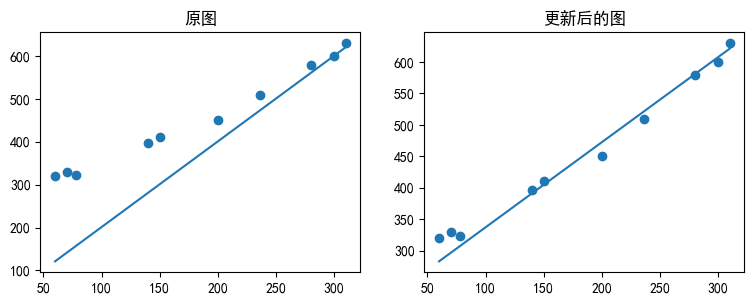

In [12]:
# 可以对比一下训练前和训练后的图像
fig = plt.figure()
# 原图
ax1 = fig.add_axes([0,0,0.5,0.5])
ax1.scatter(ad_fee,click)
ax1.plot(ad_fee,[2*x+1 for x in ad_fee])
ax1.set_title("原图")
# 更新后
ax2 = fig.add_axes([0.6,0,0.5,0.5])
ax2.scatter(ad_fee,click)
ax2.plot(ad_fee,pred_y)
ax2.set_title("更新后的图")
# 显示图像
plt.show()

可以看到和之前相比，使用新的参数得到的直线比之前要好很多。我们可以来看一下现在的$E(\theta)$是多少，也就是误差。

In [13]:
#计算误差
E = sum([(click[i]-pred_y[i])**2 for i in range(len(click))])/2
E

1789.6736022830057

可以看到这里比原来的误差要小了很多，这样我们就可以利用现在的直线来进行预测了。比如，假设现在广告费增到500，那么应该可以得到的点击量应该是

In [14]:
theta_1*500+theta_0

879.0354505928892

也就是说若广告费到500的话，那么点击量应该会到880左右。

当然，虽然现在比一开始要好很多了，但是还是有差距。那么要怎么样进一步地去缩小差距呢？接下来进入**多项式回归**

## 多项式回归

刚刚使用的是一次函数$y=\theta_{1}x+\theta_{0}$，也就是直线来进行逼近的。现在，我们可以使用曲线来逼近，二次函数甚至三次、n次函数进行拟合。
$$
f_{\theta}(x) = \theta_{2}x^{2}+\theta_{1}x+\theta_{0}
$$
$$
f_{\theta}(x) = \theta_{n}x^{n}+...+\theta_{2}x^{2}+\theta_{1}x+\theta_{0}
$$
但需要知道的是，虽然越高次的多项式越拟合的更好，但是这就会出现过拟合的情况，导致对训练样本的预测很准，但是对验证样本的效果不佳，也就是模型的泛化能力不行。

这里我们可以用二次多项式再来试一次！
$$
\theta_{0} = \theta_{0}-\sum [(y_{\theta}-y)*1]
$$
$$
\theta_{1} = \theta_{1}-\sum [(y_{\theta}-y)*x]
$$
$$
\theta_{2} = \theta_{2}-\sum [(y_{\theta}-y)*x^{2}]
$$

[303.092, 314.098, 322.99208, 394.61199999999997, 406.61, 468.46000000000004, 514.91152, 573.868, 601.46, 615.442]
theta_0:259.6565186661426 theta_1:0.7812284302914565 theta_2:0.001244416554768104


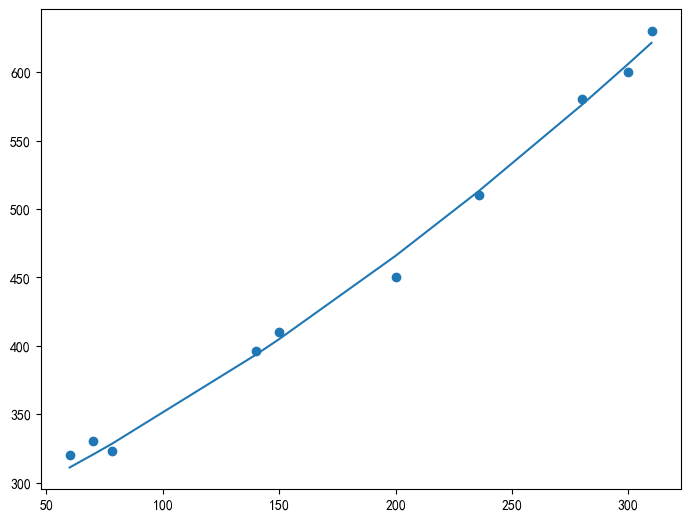

In [15]:
# 定义参数
theta_0 = 239.66
theta_1 = 1.02
theta_2 = 0.00062
# 设置学习率
learning_rate = 0.000001
# 迭代次数
n = 1600000

print([theta_2*x**2+theta_1*x+theta_0 for x in ad_fee])

# 更新参数
for i in range(n):
    pred_y = [theta_2*x**2+theta_1*x+theta_0 for x in ad_fee]
    theta_0 = theta_0 - learning_rate*sum([(pred_y[i]-click[i])*1 for i in range(len(pred_y))])
#     print([(pred_y[i]-click[i])*1 for i in range(len(pred_y))]) 傻逼了，搞了半天，忘记乘学习率了，就说怎么一直这么大
    theta_1 = theta_1 - learning_rate*sum([(pred_y[i]-click[i])*ad_fee[i] for i in range(len(pred_y))])
    theta_2 = theta_2 - learning_rate*0.00001*sum([(pred_y[i]-click[i])*ad_fee[i]**2 for i in range(len(pred_y))])
pred_y = [theta_2*x**2+theta_1*x+theta_0 for x in ad_fee]
# 打印更新后的参数
print(f"theta_0:{theta_0} theta_1:{theta_1} theta_2:{theta_2}")
# 绘制图像
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(ad_fee,click)
ax.plot(ad_fee,pred_y)

plt.show()

In [16]:
E = sum([(click[i]-pred_y[i])**2 for i in range(len(pred_y))])/2
E

307.59714460729487

看比之前的1700多更低了，我们成功实现了从66000多的误差到1700多，到现在的300多，大飞跃！

不过我们通常会使用的是**MSE(Mean Square Error)**，即均分误差来衡量回归模型的精度，其实就是上面的Error这个目标函数除2改成除n，来求平方和的平均值，至于之前为什么除2，其实只是为了就导方便而已(二次方求导会下来一个2，所以除以一个2恰好抵消。)

In [19]:
MSE = sum([(click[i]-pred_y[i])**2 for i in range(len(pred_y))])/len(pred_y)
MSE

61.519428921458974

## 多重回归
前面使用到的都是单一的自变量，即广告费来决定点击量，但现实中当然不止这一个因素影响着点击量，比如广告位的位置，显示的时间段等都会对点击量有所影响。因此，这个时候有会个多个自变量($x_{1},x_{2}...x_{n}$)，不过其实和一个自变量的时候是一样的，仍然把这些视为样本点，只是现在不是二维的因此无法直接通过图像表示出来，但我们索要做的事情并没有变：
1. 构建目标函数
目标函数仍然可以使用最小二乘法，使用$E(\theta)=\frac{1}{2}(y-y_{\theta})^{2}$,其中不同的只是$y_{\theta}$发生了变化，例如一次多项式可以是：$y_{\theta}=\theta_{n}x_{n}+...+\theta_{2}x_{2}+\theta_{1}x_{1}+\theta_{0}$

这里为了简化，其实可以将**x**和**$\theta$**表示为向量的形式:
$$
x = \begin{bmatrix} 1 \\ x_{1} \\ x_{2} \\ : \\ x_{n} \end{bmatrix}
\theta = \begin{bmatrix} \theta_{0} \\ \theta_{1} \\ \theta_{2} \\ : \\ \theta_{n} \end{bmatrix}
$$
这样就可以直接使用**$\theta^{T}x$**来表示$y_{\theta}$了，其实都是一样的，只是表示的形式变了一点点。
2. 梯度下降法
还是和之前一样，求导，用梯度下降法更新参数，仍然是对各个$\theta_{i}$求偏导然后进行更新。

和之前一样，如果这里也想使用高次的多项式的话，也是一样的，如可以写这样的一个多项式：$y_{\theta}=\theta_{3}x_{2}^{2}+\theta_{2}x_{2}+\theta_{1}x_{1}+\theta_{0}$

## 随机梯度下降法

在使用之前的梯度下降法的时候，我们在更新参数的这个步骤中，是求了所有的样本的预测值与真实值差的平方和，但是当样本量巨大的时候，每一次都全都算的话**计算量太大**了，而且还会**陷入局部最优**的情况。因此，为了能够解决这样的问题，我们引入了**随机梯度下降法**，顾名思义，就是随机选择一个样本点来更新本次的参数，而不是使用全部的样本点来进行更新，也就是说用之前的梯度下降更新一次参数的运算量(求n个差)，随机梯度下降法可以进行n次参数的更新了！速度大大提高！

可以实际的来看一下更新的表达式的变化：

梯度下降法：
$$
\theta_{i} = \theta_{i}-\eta \sum [(y_{\theta}-y)x]
$$

随机梯度下降法：
$$
\theta_{i} = \theta_{i}-\eta (y_{\theta k}-y_{k})*x
$$

可以看到，唯一的区别就只是在于有没有那个$\sum $，随机梯度下降就只是随机选一个样本对所有的参数进行更新。

## 小批量(min-batch)梯度下降法

小批量梯度下降法介于梯度下降法与随机梯度下降法之间，每次随机选择m个样本对参数进行更新，更新表达式为：
$$
\theta_{i} = \theta_{i} - \eta \sum_{k}^{m} [(f_{\theta}(x^{(k)})-y^{(k)})x_{i}]
$$